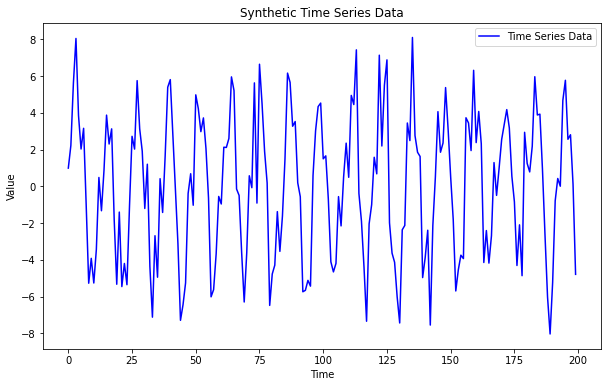

/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/christianbasile/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/deterministic.py:1451: FutureWarning: pandas.Int64Index is 

AttributeError: 'pandas._libs.properties.CachedProperty' object has no attribute 'func'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pykalman import KalmanFilter

# Generate synthetic time series data with seasonality and noise
np.random.seed(42)
n_obs = 200
t = np.arange(n_obs)
seasonal_component = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(loc=0, scale=2, size=n_obs)
data = seasonal_component + noise

# Plot the synthetic data
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Time Series Data', color='blue')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Synthetic Time Series Data')
plt.show()

# ARIMA modeling
# Fit ARIMA model
order = (2, 1, 1)  # Example order, you may need to choose based on data analysis
arima_model = sm.tsa.ARIMA(data, order=order)
arima_results = arima_model.fit()

# Forecast future values using ARIMA model
forecast_steps = 20
forecast, stderr, conf_int = arima_results.forecast(steps=forecast_steps)

# Plot the original data and the ARIMA forecast
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Time Series Data', color='blue')
plt.plot(np.arange(n_obs, n_obs + forecast_steps), forecast, label='ARIMA Forecast', color='red')
plt.fill_between(np.arange(n_obs, n_obs + forecast_steps), conf_int[:, 0], conf_int[:, 1], alpha=0.3, color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('ARIMA Forecast')
plt.show()

# Kalman filter modeling
# Define the Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Fit the Kalman filter to the data
kf = kf.em(data, n_iter=10)  # EM algorithm for parameter estimation

# Get the filtered state means and their covariance
state_means, state_covs = kf.filter(data)

# Forecast future values using the Kalman filter
kf_forecast, kf_forecast_cov = kf.filter_update(np.zeros(forecast_steps))

# Plot the original data and the Kalman filter forecast
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Time Series Data', color='blue')
plt.plot(np.arange(n_obs, n_obs + forecast_steps), kf_forecast, label='Kalman Filter Forecast', color='green')
plt.fill_between(np.arange(n_obs, n_obs + forecast_steps),
                 kf_forecast - 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 kf_forecast + 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 alpha=0.3, color='green')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Kalman Filter Forecast')
plt.show()


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Generate synthetic time series data with seasonality and noise
np.random.seed(42)
n_obs = 200
t = np.arange(n_obs)
seasonal_component = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(loc=0, scale=2, size=n_obs)
data = seasonal_component + noise

# Kalman filter modeling
# Define the Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Fit the Kalman filter to the data
kf = kf.em(data, n_iter=10)  # EM algorithm for parameter estimation

# Get the filtered state means and their covariance
state_means, state_covs = kf.filter(data)

# Forecast future values using the Kalman filter
forecast_steps = 20
kf_forecast, kf_forecast_cov = kf.filter_update(np.zeros(forecast_steps))

# Seasonal decomposition using moving averages
window = 12  # Seasonal window size for moving average
seasonal_avg = np.convolve(data, np.ones(window) / window, mode='valid')

# Plot the original data and the Kalman filter forecast
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Time Series Data', color='blue')
plt.plot(np.arange(n_obs, n_obs + forecast_steps), kf_forecast, label='Kalman Filter Forecast', color='green')
plt.fill_between(np.arange(n_obs, n_obs + forecast_steps),
                 kf_forecast - 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 kf_forecast + 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 alpha=0.3, color='green')
plt.plot(t[window - 1:], seasonal_avg, label='Seasonal Decomposition (Moving Avg)', color='orange')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Kalman Filter Forecast vs. Seasonal Decomposition (Moving Avg)')
plt.show()


TypeError: filter_update() missing 1 required positional argument: 'filtered_state_covariance'

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Generate synthetic time series data with seasonality and noise
np.random.seed(42)
n_obs = 200
t = np.arange(n_obs)
seasonal_component = 5 * np.sin(2 * np.pi * t / 12)
noise = np.random.normal(loc=0, scale=2, size=n_obs)
data = seasonal_component + noise

# Kalman filter modeling
# Define the Kalman filter
kf = KalmanFilter(initial_state_mean=0, n_dim_obs=1)

# Fit the Kalman filter to the data
kf = kf.em(data, n_iter=10)  # EM algorithm for parameter estimation

# Get the filtered state means and their covariance
state_means, state_covs = kf.filter(data)

# Forecast future values using the Kalman filter
forecast_steps = 20
kf_forecast, kf_forecast_cov = kf.filter_update(np.zeros(forecast_steps))

# Seasonal decomposition using moving averages
window = 12  # Seasonal window size for moving average
seasonal_avg = np.convolve(data, np.ones(window) / window, mode='valid')

# Plot the original data and the Kalman filter forecast
plt.figure(figsize=(10, 6))
plt.plot(t, data, label='Time Series Data', color='blue')
plt.plot(np.arange(n_obs, n_obs + forecast_steps), kf_forecast, label='Kalman Filter Forecast', color='green')
plt.fill_between(np.arange(n_obs, n_obs + forecast_steps),
                 kf_forecast - 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 kf_forecast + 1.96 * np.sqrt(kf_forecast_cov[:, 0]),
                 alpha=0.3, color='green')
plt.plot(t[window - 1:], seasonal_avg, label='Seasonal Decomposition (Moving Avg)', color='orange')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.title('Kalman Filter Forecast vs. Seasonal Decomposition (Moving Avg)')
plt.show()


TypeError: filter_update() missing 1 required positional argument: 'filtered_state_covariance'